In [1]:
%matplotlib widget
# %matplotlib notebook
import matplotlib
import seaborn as sb
from matplotlib import pyplot as plt
import holoviews as hv

import numpy as np
import pandas as pd
import pickle as pk
from time import time

from datetime import datetime

# Jupyter Specifics
%matplotlib inline
from IPython.display import display, HTML
from ipywidgets.widgets import interact, interactive, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons, fixed, Button, HBox, VBox
display(HTML("<style>.container { width:100% !important; }</style>"))
style = {'description_width': '100px'}
slider_layout = Layout(width='99%')


In [2]:
from Cluster import *

In [3]:
bd = BaseData('data_all_base')

reading in data from data_all_base ...
elapsed:  6.527110815048218


In [4]:
# clusdtypes should be in ['JRP1','ORP1','JWP1','OWP1','JRT1','ORT1','JWT1','OWT1']
# database JHU/OWID  (J/O) 
# report_correct T or F   (R/W)
# syncat peak/thresh  (P/T)
# alternative to read from file: use constructor ClData=ClusterData(bd,clusdtype='JRP1',cluster_data=True)

clusdtype='JRP1'
start=time()
print('reading in data from','./pks/data_cluster_'+clusdtype+'.pk','...')
with open('./pks/data_cluster_'+clusdtype+'.pk','rb') as fp:
    foo = pk.load(fp)
print('elapsed: ',time()-start)
ClData = foo['ClData']

reading in data from ./pks/data_cluster_JRP1.pk ...
elapsed:  0.041728973388671875


In [5]:
#[x for x in dir(ClData) if '__' not in x]

In [6]:
exec(open('ClusterFit.py','r').read())

In [7]:
# from Consensus import *
# NB:  scoping problem seems to prevent import from working properly.
# instead use exec below.
country_display = None
geog = None
geog1 = None
chosen_country= 'Australia'
exec(open('Consensus.py','r').read())

In [8]:
#hv.extension('bokeh')
from holoviews import opts
#hv.notebook_extension()
hv.extension('matplotlib')


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [9]:
[x for x in bd.covid_owid_ts]

['confirmed',
 'deaths',
 'recovered',
 'tests',
 'stringency',
 'population',
 'population_density',
 'gdp_per_capita',
 'new_deaths',
 'new_deaths_smoothed',
 'deaths_smoothed',
 'new_deaths_corrected',
 'new_deaths_corrected_smoothed',
 'deaths_corrected_smoothed',
 'new_confirmed',
 'new_confirmed_smoothed',
 'confirmed_smoothed',
 'new_confirmed_corrected',
 'new_confirmed_corrected_smoothed',
 'confirmed_corrected_smoothed',
 'confirmed_linr_corrected_smoothed',
 'new_confirmed_nonlin_corrected_smoothed',
 'confirmed_nonlin_corrected_smoothed',
 'new_confirmed_nonlinr_corrected_smoothed',
 'confirmed_nonlinr_corrected_smoothed']

In [10]:
from datetime import datetime

In [11]:
fmt = '%m/%d/%y'
dts = bd.covid_owid_ts['new_confirmed']['dates']
dts = [datetime.strptime(dt,fmt) for dt in dts]

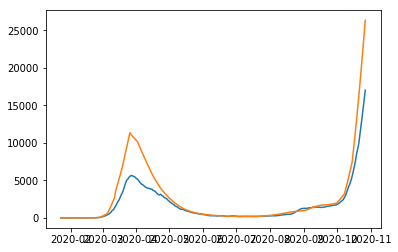

In [12]:
plt.plot(dts,bd.covid_owid_ts['new_confirmed_smoothed']['Italy']);
plt.plot(dts,bd.covid_owid_ts['new_confirmed_nonlinr_corrected_smoothed']['Italy']);


In [13]:
dts[-1]

datetime.datetime(2020, 10, 27, 0, 0)

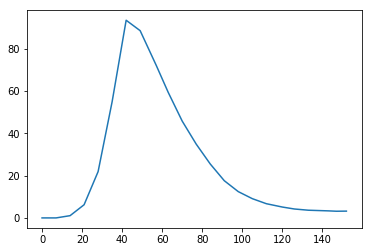

In [14]:
plt.plot(ClData.clusdata_all['cases']['Italy']);

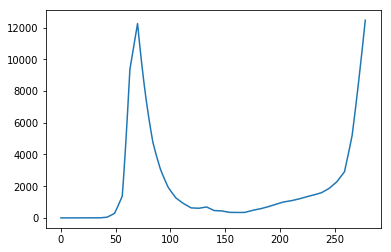

In [15]:
plt.plot(bd.new_cases_c_nonlinr_owid['Germany']);

# Sankey with different data sources

clusdtypes should be in ['JRP1','ORP1','JWP1','OWP1','JRT1','ORT1','JWT1','OWT1']

1. database JHU/OWID  (J/O) 
2. report_correct T or F   (R/W)
3. syncat peak/thresh  (P/T)

## Sankey of 'JRP1' with ['JRP1','ORP1','JWP1','OWP1','JRT1','ORT1','JWT1','OWT1']

In [16]:
# calculate consensus country list for all datasets
clusdtypes=['JRP1','ORP1','JWP1','OWP1','JRT1','ORT1','JWT1','OWT1']
# clusdtypes=['JRP1','ORT1']
conss = {}
first = True
for clusdtype in clusdtypes:
    # print('reading in data from','./pks/data_cluster_'+clusdtype+'.pk','...')
    with open('./pks/data_cluster_'+clusdtype+'.pk','rb') as fp:
        foo = pk.load(fp)
    ClData = foo['ClData']
    cons = Consensus(ClData)
    if first:
        cons_countries = set(cons.countries)
        first = False
    else:
        cons_countries = cons_countries.intersection(set(cons.countries))
    conss.update({clusdtype:cons})
    
cons_countries = list(np.sort(list(cons_countries)))
for clusdtype in clusdtypes:
    cons = conss[clusdtype]
    cons.countries=cons_countries
    conss.update({clusdtype:cons})

In [17]:
# using consensus country list calculate all consensus scan clusterings
for clusdtype in clusdtypes:
    cons = conss[clusdtype]
    cons.countries=cons_countries
    conss.update({clusdtype:cons})
    cons.scan(progress=True,name=clusdtype)
    cons.make_clusters(diag=False)
    mycols = [i for i,r in enumerate(cons.report) if ('deaths,' in cons.report[i] or 'cases,' in cons.report[i] or 'cases_nonlinr,' in cons.report[i])]
    # mycols = range(24)
    cons.swizzle(cols=mycols)
    conss.update({clusdtype:cons})
    

In [18]:
for clusdtype in clusdtypes:
    print(clusdtype,len(conss[clusdtype].scountries),conss[clusdtype].refclustering)

JRP1 68 19
ORP1 68 19
JWP1 68 15
OWP1 68 11
JRT1 68 7
ORT1 68 7
JWT1 68 23
OWT1 68 23


ORP1


:Sankey   [c1,c2]   (val)
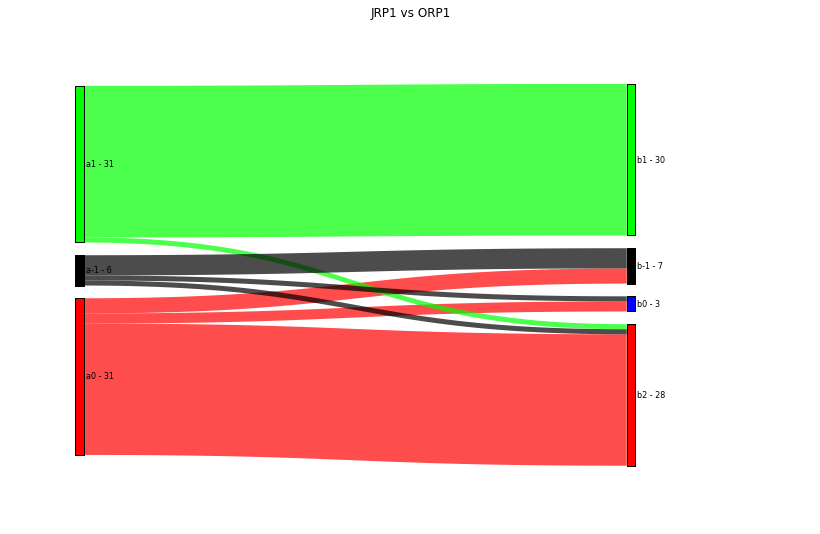

JWP1


:Sankey   [c1,c2]   (val)
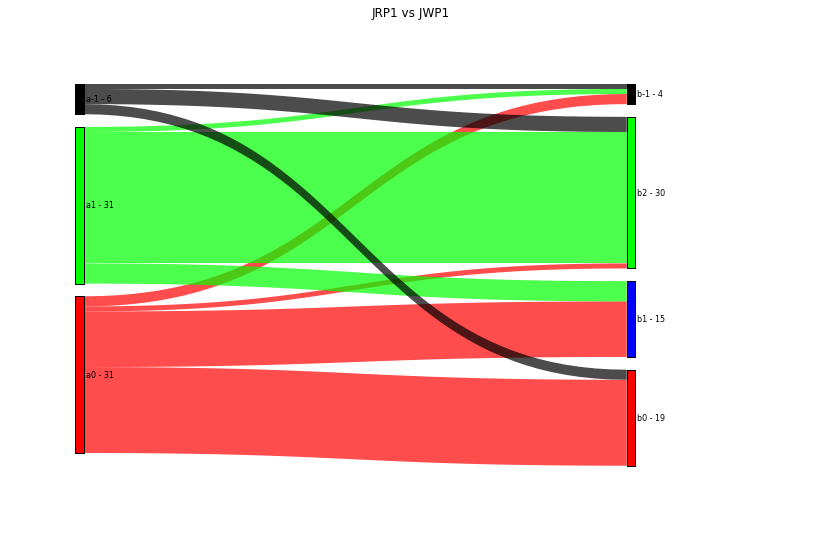

OWP1


:Sankey   [c1,c2]   (val)
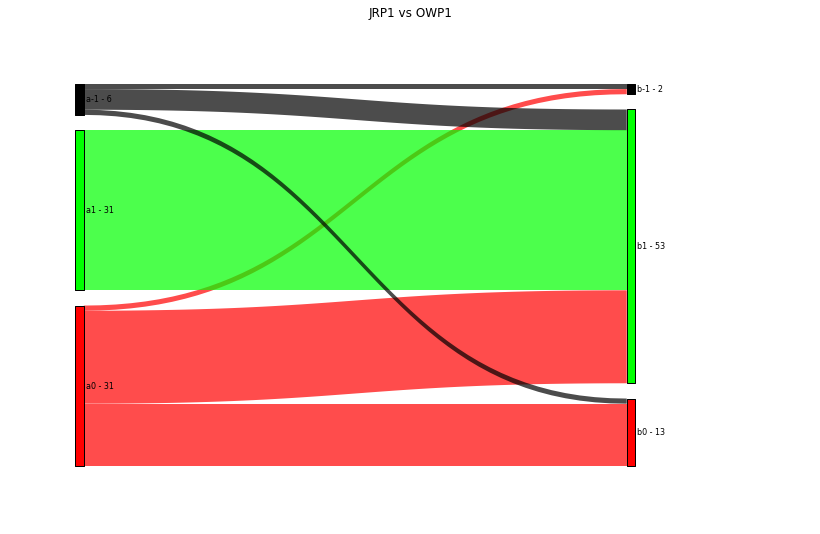

JRT1


:Sankey   [c1,c2]   (val)
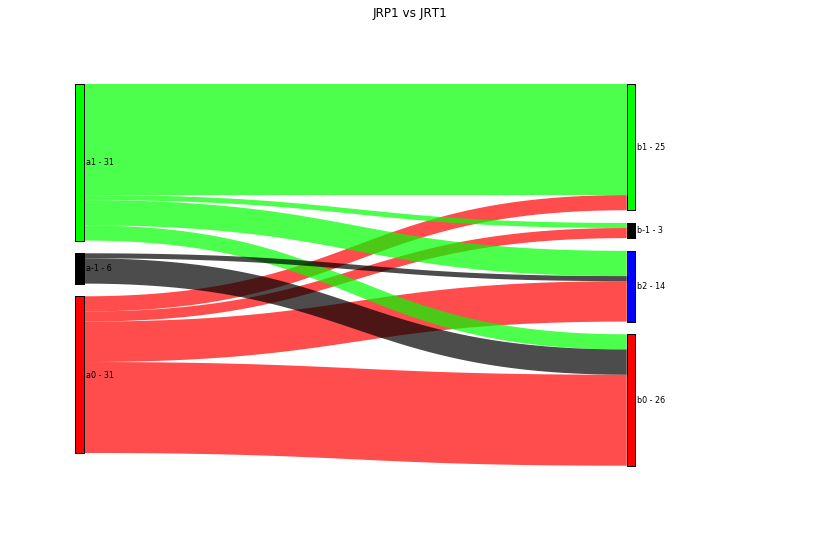

ORT1


:Sankey   [c1,c2]   (val)
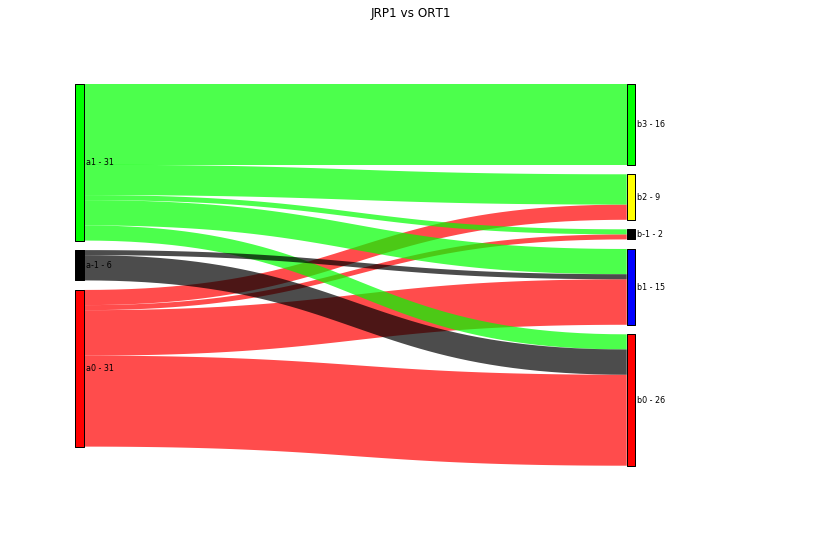

JWT1


:Sankey   [c1,c2]   (val)
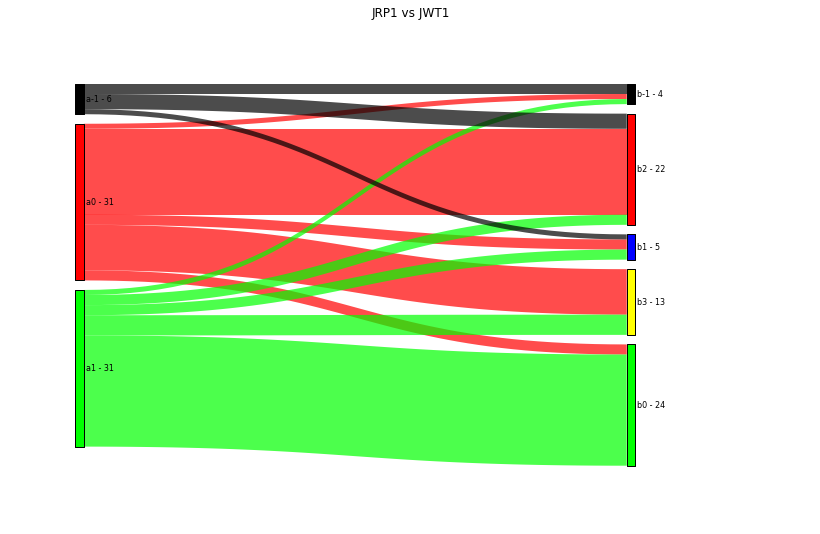

OWT1


:Sankey   [c1,c2]   (val)
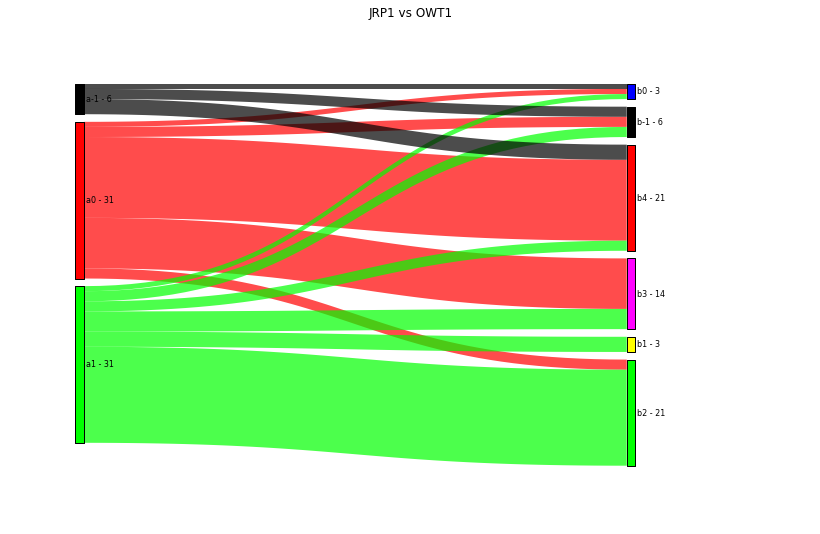

In [19]:
sankeys= {}
cons1 = conss[clusdtypes[0]]
for clusdtype in clusdtypes[1:]:
    print(clusdtype)
    cons2 = conss[clusdtype]
    h1 = sankey(cons1,cons2,cons1_name=clusdtypes[0],cons2_name=clusdtype,relabel=True,merge=False,hue_only=True)
    sankeys.update({clusdtype:h1})
    display(h1)

In [21]:
def clust_assign(clustering_a,clustering_b,colors_a,colors_b):
    """ relables clustering b to match clustering a optimally
        according tot he Hungarian algorithm, implemented in scipy
    """    
    labels_a = list(set(clustering_a))
    labels_b = list(set(clustering_b))
    scores = np.zeros((len(labels_a),len(labels_b)),dtype=float)
    for i,a in enumerate(labels_a):
        for j,b in enumerate(labels_b):
            scores[i,j] = 1-score_int_union(matchset(clustering_a,a),matchset(clustering_b,b)) # length intersection divided by length union (result 0. to 1. for identity)
    assign_b_to_a,assign_a_to_b=scipy.optimize.linear_sum_assignment(scores)
    dic_a_2_b = {labels_a[i]:labels_b[j] for i,j in enumerate(assign_a_to_b)}
    return dic_a_2_b

In [73]:
from scipy.optimize import linear_sum_assignment
cons1 = conss['JRP1']
cons2 = conss['ORT1']
refc1 = cons1.refclustering
refc2 = cons2.refclustering
clustering_a = np.array([cons1.clusdata[refc1][i] for i in cons1.sidx])
clustering_b =  np.array([cons2.clusdata[refc2][i] for i in cons1.sidx])
labels_a = list(set(clustering_a))
labels_b = list(set(clustering_b))
labels_a_clus = list(set(clustering_a)-set([-1]))
labels_b_clus = list(set(clustering_b)-set([-1]))
print('labels_a_clus',labels_a_clus)
print('labels_b_clus',labels_b_clus)
scores = np.zeros((len(labels_a_clus),len(labels_b_clus)),dtype=float)
for i,a in enumerate(labels_a_clus):
    for j,b in enumerate(labels_b_clus):
        scores[i,j] = 1-score_int_union(matchset(clustering_a,a),matchset(clustering_b,b)) # length intersection divided by length union (result 0. to 1. for identity)
print('scores')
print(scores)
row_ind,col_ind=linear_sum_assignment(scores)
if len(row_ind) != len(col_ind):
    print('Unequal lengths of row and col indices in optimal assignment')
    
dic_a_2_b = {labels_a_clus[row_ind[i]]:labels_b_clus[col_ind[i]] for i in range(len(row_ind))}
dic_a_2_b.update({-1:-1})
dic_b_2_a = {labels_b_clus[col_ind[i]]:labels_a_clus[row_ind[i]] for i in range(len(row_ind))}
dic_b_2_a.update({-1:-1})

print('a_2_b',dic_a_2_b)
print('b_2_a',dic_b_2_a)

maxlabel = max(labels_a) 
relabel_b = {}
    
for a in labels_a:
    if a not in dic_a_2_b.keys():
        dic_a_2_b.update({a:None})
    else:
        relabel_b[dic_a_2_b[a]]=a       
for b in labels_b: #unmatched labels b are given new cluster labels
    if b not in relabel_b.keys():
        maxlabel = maxlabel+1
        relabel_b[b]=maxlabel
    elif b != -1:
        if scoredict[(dic_b_2_a[b] ,b)] > 0.8:  # insufficient match, new cluster name
            print('new label',dic_b_2_a[b],b,scoredict[(dic_b_2_a[b] ,b)])
            maxlabel = maxlabel+1
            relabel_b[b]=maxlabel
new_labels_b = np.array([relabel_b[b] for b in labels_b])
print('')
print(relabel_b)
print(labels_b)
print(new_labels_b)    
        
# colors of a unchanged
# colors of b 


labels_a_clus [0, 1, 2, 3]
labels_b_clus [0, 1, 2, 3]
scores
[[0.38235294 1.         0.86486486 1.        ]
 [0.98039216 0.86206897 0.88571429 0.42307692]
 [1.         0.69230769 0.78947368 1.        ]
 [1.         0.90909091 0.94117647 0.94736842]]
a_2_b {0: 0, 1: 3, 2: 1, 3: 2, -1: -1}
b_2_a {0: 0, 3: 1, 1: 2, 2: 3, -1: -1}
new label 3 2 0.9411764705882353

{0: 0, 3: 1, 1: 2, 2: 4, -1: -1}
[0, 1, 2, 3, -1]
[ 0  2  4  1 -1]


In [45]:
# bokeh does not support export to ipywidgets or matplotlib, instead use file export and import via png
from bokeh.io import export_png
from ipywidgets import Image
sankeyims = {}
for clusdtype in clusdtypes[1:]:
    fn="sankey_plot_JRP1_"+clusdtype+".png"
    hv.save(sankeys[clusdtype], filename=fn, fmt='png')
    file = open(fn, "rb")
    image = file.read()
    sankeyims.update({clusdtype:Image(value=image,format='png',width=400,height=300)})

In [ ]:
# NB something has gone wrong with the colours, after integration following successful mapping
from ipywidgets.widgets import Button, HBox, VBox
from ipywidgets import RadioButtons
top_box = HBox([sankeyims[x] for x in [clusdtypes[1],clusdtypes[2],clusdtypes[4]]]);
bot_box = HBox([sankeyims[x] for x in [clusdtypes[3],clusdtypes[5],clusdtypes[7]]]);
VBox([top_box ,bot_box])     

NameError: name 'Image' is not defined

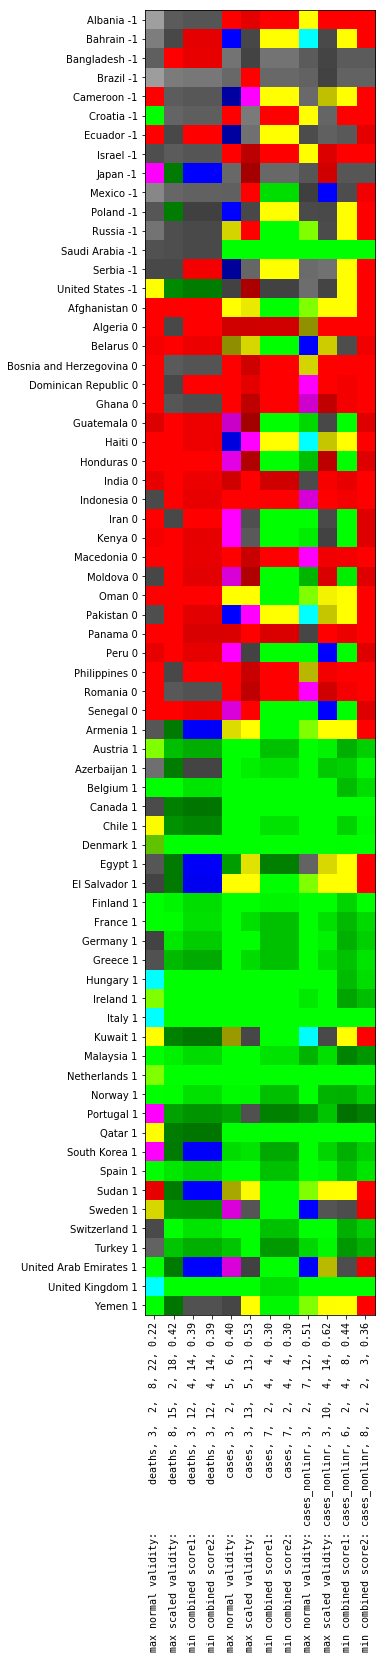

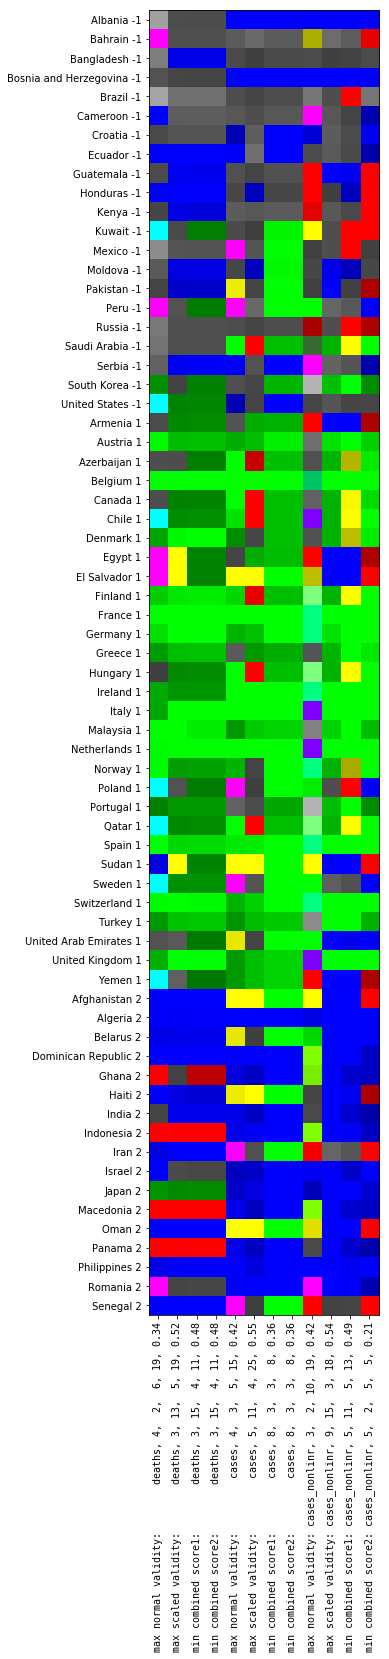

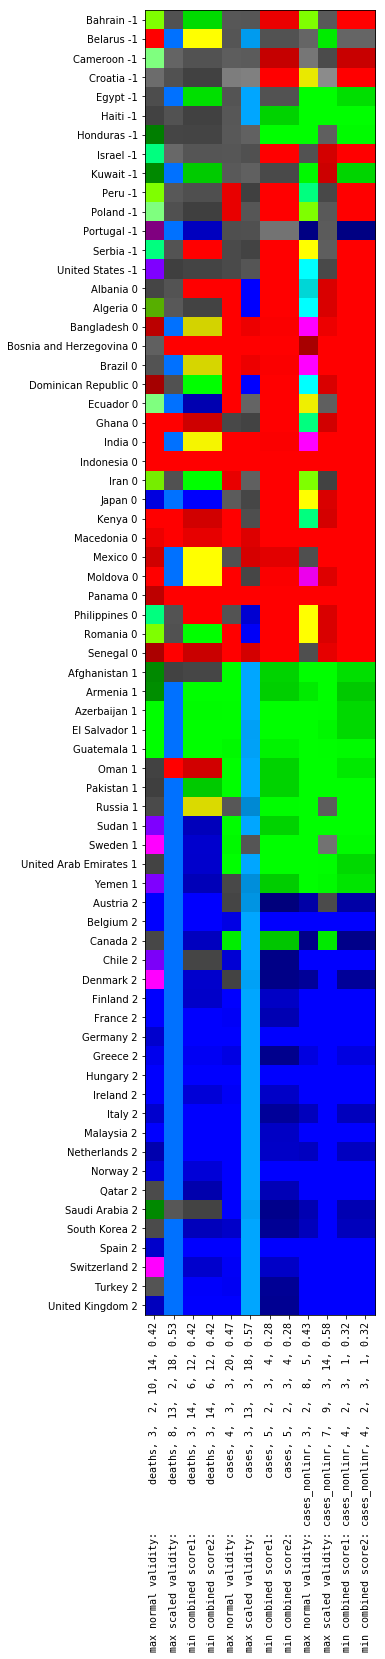

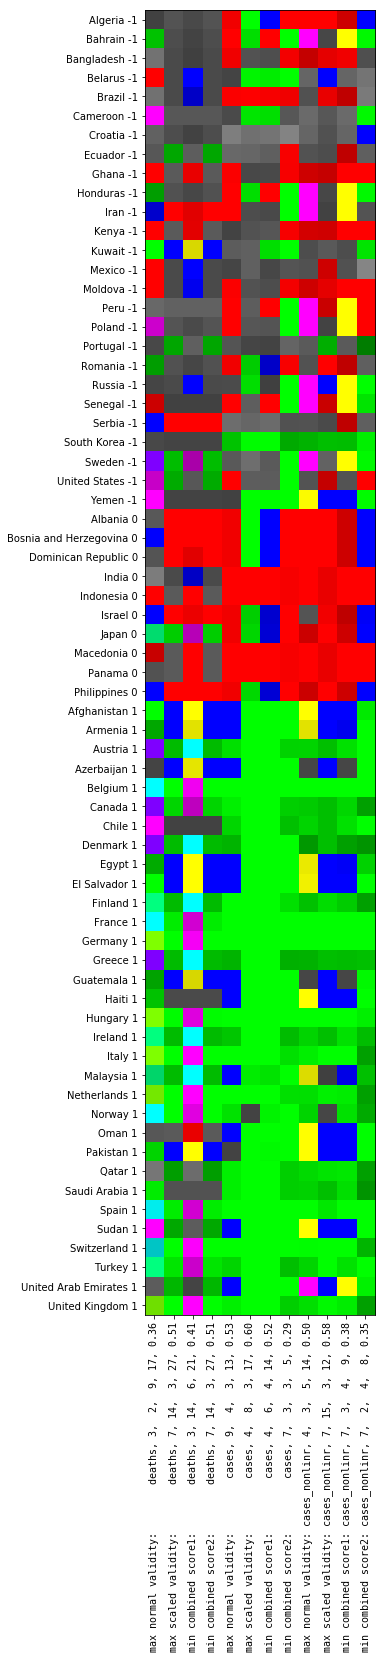

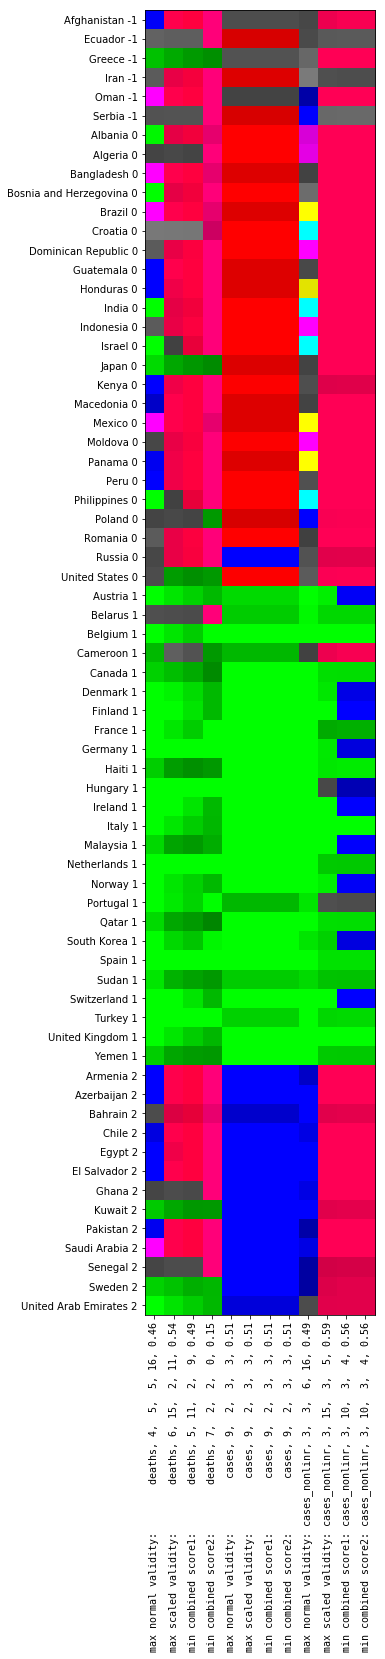

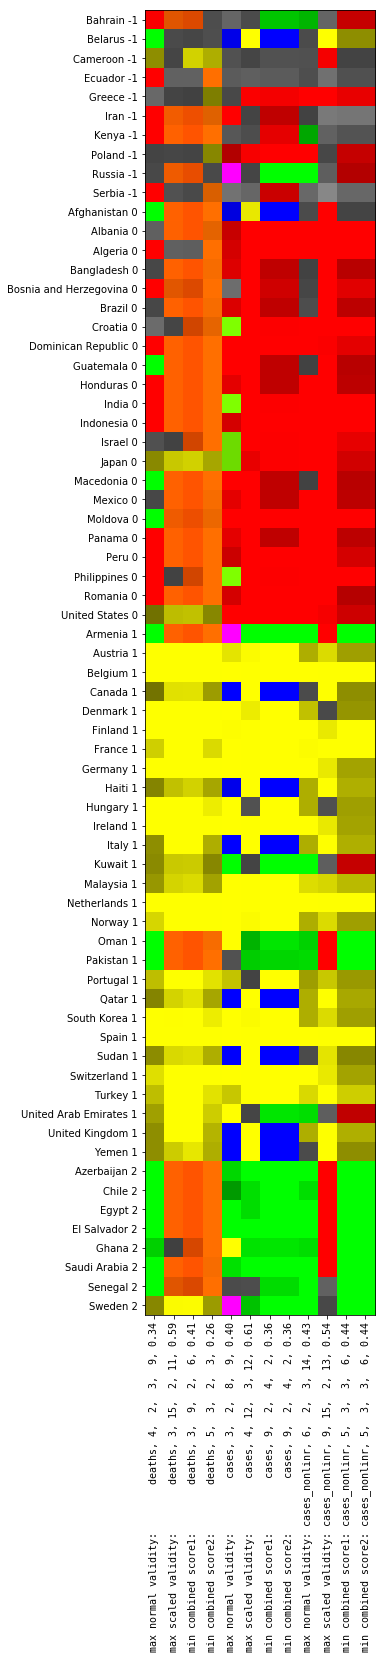

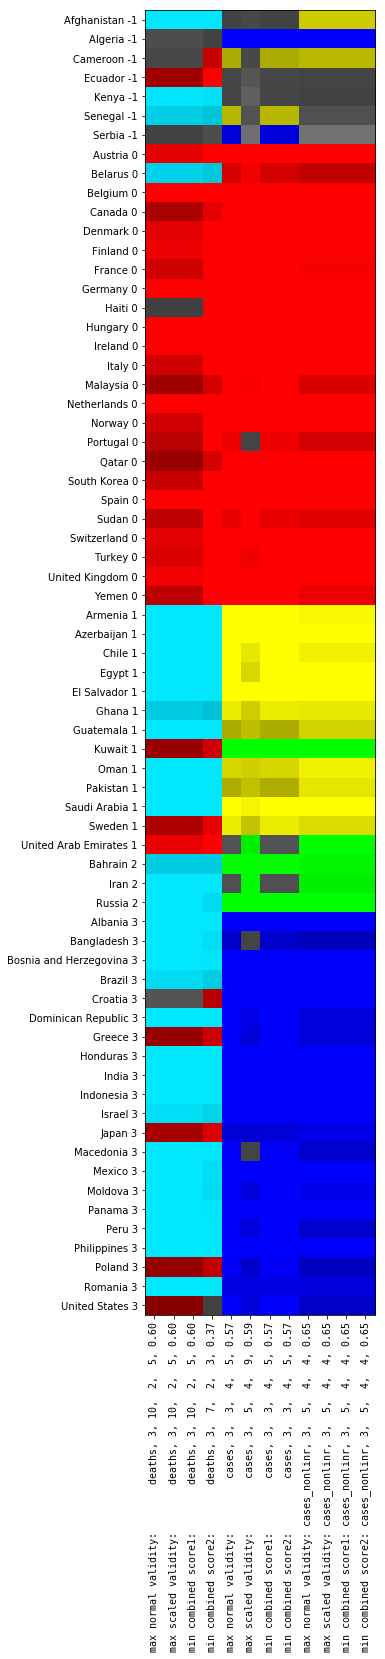

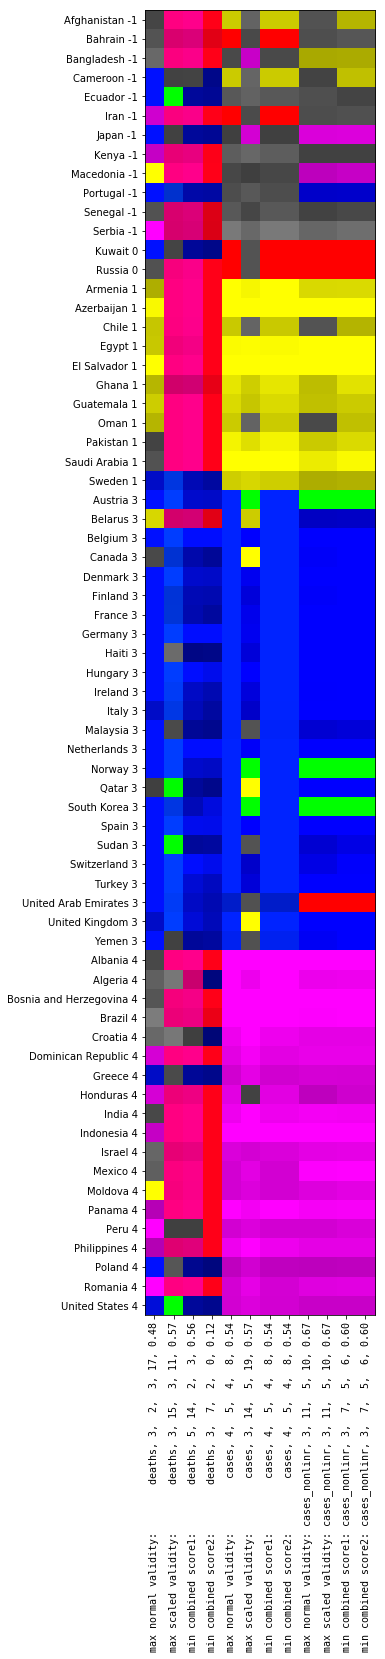

In [22]:
plts = [None]*8
cnt = 0
for clusdtype in clusdtypes[0:]:
    out=Output(layout=Layout(height='800px', width = '300px', border='solid'))
    plts[cnt]=conss[clusdtype].plot_swiz()
    cnt = cnt + 1
display(HBox([wi(p) for p in plts]))

## Widget of Sankey diagrams

In [ ]:
from IPython.display import display
def mysankey(dics=dics,clusdtype1='JRP1',clusdtype2='JRT1'):
    dic1 = dics[clusdtype1]
    dic2 = dics[clusdtype2]
    df = dic_compare(dic1,dic2)
    h1 = hv.Sankey(df,kdims=['c1','c2'],vdims=['val'])
    h1.opts(title=clusdtype1+' vs '+clusdtype2, cmap=mymap, edge_color='c1', node_alpha=1.0, edge_alpha=0.7)
    fn="./sks/sankey_plot_"+clusdtype1+"_"+clusdtype2+".png"
    hv.save(h1, filename=fn, fmt='png')
    file = open(fn, "rb")
    image = file.read()
    wi = Image(value=image,format='png',width=800,height=600)
    display(wi)

In [ ]:
rad1=RadioButtons(options=clusdtypes,description='clusdtype1:',disabled=False)
rad2=RadioButtons(options=clusdtypes,description='clusdtype2:',disabled=False)
sankey_display = interactive_output(mysankey,dics=fixed(dics),clusdtype1=rad1,clusdtype2=rad2)
ui = HBox([rad1,rad2,sankey_display])

In [ ]:
display(ui)

# Consensus basics

In [ ]:
#foo = Consensus(cases=['deaths','cases','cases_nonlinr'])
cons = Consensus(ClData)

In [ ]:
cons.cases

In [ ]:
# import warnings
# warnings.simplefilter('error', RuntimeWarning)   # to replace warnings by errors to allow traceback
# warnings.simplefilter('error',DeprecationWarning)

In [ ]:
# loop over 24 scans: 4* cases index + scoring method (max validity or min score options) 0 to 3:
# 0 validity = max(validity,0.001)
# 1 validitysc = rescale(validity,ncomp)  # rescaled to account for biasses in number of components of projection
# 2 score1 = 1.0/validitysc + float(nunclustered)/5. + np.abs(float(nclus)-4.)/2.  # penalizes additively
# 3 score2 = float(nunclustered)*(4.+np.abs(nclus-4.))/(validitysc*20.)            # penalizes multiplicatively : all criteria required
cons.scan() # default diag=False progress=True for no output except progress bar : also progress=False for no output

In [ ]:
# plot of probability of countries being in cluster (blue) and 1- outlier score (red)
# extracted to paper figure in Assembled_Figs.pptx
cons.plot_outliers()

**Must do this to graph any of the clusterings...**

In [ ]:
cons.make_clusters()

In [ ]:
cons.plot_stage(3)

In [ ]:
cons.probdata2.shape

In [ ]:
plt.imshow(cons.probdata)
plt.show()
plt.imshow(cons.probdata2);

In [ ]:
# the end result here is with the countries ordered by the refclustering column (the one with the best score2)
# see swizzle below to reorder countries by means of the consensus clusters
cons.plot_all_stages();

In [ ]:
cons.swizzle(satthresh=0.6) # the closer the satthresh to one, the more countries end up in unclustered
print(len(cons.classes))
print(cons.classes)

In [ ]:
classes1 = cons.classes

In [ ]:
cons.clusdata_s

In [ ]:
cons.clusdata_s.shape

In [ ]:
[x for x in cons.dics[-1].values()]==[x for x in cons.dics[-2].values()]

In [ ]:
cons.plot_swiz()


In [ ]:
def myplot(cons, dataname='deaths',country='Australia'):
    if country in cons.countries:
        plt.plot(cons.cldata.clusdata_all[dataname][country])
        
country_display = interactive(myplot,cons=fixed(cons),dataname=cons.cases,country=cons.countries);

In [ ]:
cons.make_map()
country_display = interactive(myplot,cons=fixed(cons),dataname=cons.cases,country=list(geog['name']));
display(country_display)

In [ ]:
cons.map

## restricted columns...

In [ ]:
mycols = [i for i,r in enumerate(cons.report) if ('deaths,' in cons.report[i] or 'cases,' in cons.report[i] or 'cases_nonlinr,' in cons.report[i])]

In [ ]:
mycols

In [ ]:
cons.coldata.shape

In [ ]:
fofo = np.array([cons.coldata[0:,ii,0:] for ii in mycols])
fofo.shape

In [ ]:
cons.swizzle(cols=mycols)

In [ ]:
dic2df(cons.swdic)

In [ ]:
cons.plot_swiz();

In [ ]:
cons.make_map()

In [ ]:
cons.map

In [ ]:
country_display = interactive(myplot,cons=fixed(cons),dataname=cons.cases,country=list(geog['name']));
display(country_display)

In [ ]:
def plot_quantile(classdic,dtype,clusdata_all,title):
    fig, ax = plt.subplots(1,len(list(set(classdic))),figsize=(30,5))
    cnt = 0
    for label in classdic:   
        nelts = len(classdic[label])
        dats = [[max(x/max(clusdata_all[dtype][cc]),0.) for x in clusdata_all[dtype][cc]] for cc in classdic[label] ]
        dats = np.transpose(np.array(dats))
        pdats = [pd.Series(dat) for dat in dats]
        qdats = [[pdat.quantile(q) for q in [0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.]] for pdat in pdats]
        data = np.transpose(np.array(qdats))
        # data = qdats
        x = range(len(data[0]))
        clrs = ['#f0f0f0','#c0c0c0','#505050','#303030','#ff0000','#00ff00','#303030','#505050','#c0c0c0','#f0f0f0'] # clrs[0] not used
        for i in range(1,len(data)):
            ax[cnt].fill_between(x,data[i-1],data[i],alpha=0.8,color=clrs[i-1]);
        if label != -1:
            ax[cnt].set_title('Class '+('%d' % label)+(' with %d ' % nelts)+'elts')
        else:
            ax[cnt].set_title('Unclustered'+(' with %d ' % nelts)+'elts')
        # ax[cnt].set_xticklabels("")  # x labels for cases_nonlinr!
        if cnt>0:
            ax[cnt].set_yticklabels("")
        cnt = cnt+1
    plt.suptitle(title);

In [ ]:
# quantile plots
plot_quantile(cons.swdic,'deaths',cons.cldata.clusdata_all,"Deaths")

In [ ]:
# quantile plots
plot_quantile(cons.swdic,'cases',cons.cldata.clusdata_all,"Cases")

In [ ]:
# quantile plots
plot_quantile(cons.swdic,'cases_nonlinr',cons.cldata.clusdata_all,"Test-adjusted cases")

# Sankey diagram for comparing clusterings

In [ ]:
foo = Consensus(ClData)
foo.scan()

In [ ]:
foo.make_clusters()
foo.swizzle()

In [ ]:
dic1 = foo.swdic
classes1 = foo.classes

In [ ]:
mycols = [i for i,r in enumerate(foo.report) if ('deaths,' in foo.report[i] or 'cases,' in foo.report[i] or 'cases_nonlinr,' in foo.report[i])]
print(mycols)
foo.swizzle(cols=mycols)
dic2 = foo.swdic
classes2 = foo.classes

In [ ]:
# dic_compare is defined in Consensus.py
# here we compare the clustering gained from consensus (swizzle) on all 24 columns dic1 with the subset of columns above dic2 
# counts number of common elements (countries) in each pair of cluster classes from the two clusterings
df = dic_compare(dic1,dic2)
df

In [ ]:
%%opts Sankey (cmap='tab20' edge_color='c1' node_alpha=1.0)
h1 = hv.Sankey(df,kdims=['c1','c2'],vdims=['val'])
h1                    

In [ ]:
# KLsym(invertdict(dic1),invertdict(dic2))

## compare with consensus built from fewer cases

In [ ]:
foo = Consensus(ClData)
foo.scan()

foo.make_clusters()
foo.swizzle()

dic1 = foo.swdic
classes1 = foo.classes

### compare with `cases=['deaths','cases','cases_nonlinr'],satthresh = 0.5`

In [ ]:
fooo = Consensus(ClData,cases=['deaths','cases','cases_nonlinr'],satthresh = 0.5)
fooo.scan()
fooo.make_clusters()
fooo.swizzle()


dic2= fooo.swdic

In [ ]:
df = dic_compare(dic1,dic2)

In [ ]:
df

In [ ]:
%%opts Sankey (cmap='tab20' edge_color='c1' node_alpha=1.0)
hv.Sankey(df,kdims=['c1','c2'],vdims=['val'])

In [ ]:
fooo.make_map()

fooo.map

### compare with `cases=['deaths','cases_nonlinr']`

In [ ]:
fooo = Consensus(ClData,cases=['deaths','cases_nonlinr'])
fooo.scan()
fooo.make_clusters()
fooo.swizzle()


dic2= fooo.swdic

In [ ]:
df = dic_compare(dic1,dic2)

In [ ]:
%%opts Sankey (cmap='tab20' edge_color='c1' node_alpha=1.0)
hv.Sankey(df,kdims=['c1','c2'],vdims=['val'])

In [ ]:
# print(KLsym(dic_invert(dic1),dic_invert(dic2)))

In [ ]:
fooo.make_map()

fooo.map

### compare with `cases=['deaths','cases_nonlinr'],satthresh = 0.5`

In [ ]:
fooo = Consensus(ClData,cases=['deaths','cases_nonlinr'],satthresh = 0.5)
fooo.scan()
fooo.make_clusters()
fooo.swizzle()


dic2= fooo.swdic

In [ ]:
df = dic_compare(dic1,dic2)
df

In [ ]:
%%opts Sankey (cmap='tab20' edge_color='c1' node_alpha=1.0)
hv.Sankey(df,kdims=['c1','c2'],vdims=['val'])

In [ ]:
fooo.make_map()

fooo.map

### compare with `cases=['cases_nonlinr'],satthresh = 0.5`

In [ ]:
fooo = Consensus(ClData,cases=['cases_nonlinr'],satthresh = 0.5)
fooo.scan()
fooo.make_clusters()
fooo.swizzle()


dic2= fooo.swdic

In [ ]:
df = dic_compare(dic1,dic2)
df

In [ ]:
%%opts Sankey (cmap='tab20' edge_color='c1' node_alpha=1.0)
hv.Sankey(df,kdims=['c1','c2'],vdims=['val'])

### compare with `cases=['cases'],satthresh = 0.7`

In [ ]:
fooo = Consensus(ClData,cases=['cases'],satthresh = 0.7)
fooo.scan()
fooo.make_clusters()
fooo.swizzle()


dic2= fooo.swdic

In [ ]:
df = dic_compare(dic1,dic2)
df

In [ ]:
%%opts Sankey (cmap='tab20' edge_color='c1' node_alpha=1.0)
hv.Sankey(df,kdims=['c1','c2'],vdims=['val'])

### compare with `cases=['cases_nonlinr'],satthresh = 0.7`

In [ ]:
fooo = Consensus(ClData,cases=['cases_nonlinr'],satthresh = 0.7)
fooo.scan()
fooo.make_clusters()
fooo.swizzle()


dic2= fooo.swdic

In [ ]:
df = dic_compare(dic1,dic2)
df

In [ ]:
hv.ipython.show_traceback() 

In [ ]:
%%opts Sankey (cmap='prism' edge_color='c1' node_alpha=1.0)
sank = hv.Sankey(df,kdims=['c1','c2'],vdims=['val'])
sank

# Chaining Sankeys


In [ ]:
cols = [0,1,2,3,4,5,6,7,20,21,22,23]
df = pd.DataFrame(columns=['c1','c2','val'])
cnt = 0
          
for i,j in enumerate(cols[:-1]):
    dic1 = cons.dics[j]
    s1 = set(dic1.values())
    k = cols[i+1]
    dic2 = cons.dics[k]
    s2 = set(dic2.values())
    for s in s1:
        for ss in s2:
            olap = len([x for x in cons.countries if dic1[x]==s and dic2[x]==ss])
            if olap > 0:  
                df.loc[cnt] = [str(j)+'_'+str(s),str(k)+'_'+str(ss),olap]
                cnt = cnt+1
                
# add countries
dic1 = cons.dics[cols[-1]]
s1 = set(dic1.values())
for s in s1:   
    for x in cons.countries:
        olap = 1 if dic1[x]==s else 0
        if olap > 0:  
            df.loc[cnt] = [str(cols[-1])+'_'+str(s),x,olap]
            cnt = cnt +1

In [ ]:
df

In [ ]:
from math import ceil
from holoviews.plotting.util import process_cmap

colormaps = hv.plotting.list_cmaps()
spacing = np.linspace(0, 1, 64)[np.newaxis]
opt_kwargs = dict(aspect=6, xaxis=None, yaxis=None, sublabel_format='')

def filter_cmaps(category):
    return hv.plotting.util.list_cmaps(records=True,category=category,reverse=False)

def cmap_examples(category,cols=4):
    cms = filter_cmaps(category)
    n = len(cms)*1.0
    c=ceil(n/cols) if n>cols else cols
    bars = [hv.Image(spacing, ydensity=1, label="{0} ({1})".format(r.name,r.provider))\
            .opts(cmap=process_cmap(r.name,provider=r.provider), **opt_kwargs)
           for r in cms]
    return hv.Layout(bars).opts(vspace=0.1, hspace=0.1, transpose=(n>cols)).cols(c)

In [ ]:
[x for x in hv.plotting.util.list_cmaps(records=True,category='Categorical',reverse=False) if 'matplotlib' in x]

In [ ]:
foo = matplotlib.cm.prism
print(foo)

In [ ]:
# np.random.sample(range(100))

In [ ]:
mymap = matplotlib.cm.get_cmap('cet_glasbey_light')

In [ ]:
%%opts Sankey (cmap=mymap edge_color='c1' node_alpha=0.9 edge_alpha=0.6 label_text_font_size='xx-small')
hv.Sankey(df,kdims=['c1','c2'],vdims=['val'])

### arrange according to scores

#### look at scores (validity, score1, score2)

In [ ]:
idx = [(x[6],x[7],x[8]) for x in cons.reportdata]
idx

In [ ]:
plt.scatter([x[2] for x in idx],[x[0] for x in idx])

#### validity (reportdata col 6)

In [ ]:
score = [x[6] for x in cons.reportdata]
idx = np.argsort(score)
idx = idx[::-1]  # invert score for report 6 (validity) no invert for report 7,8 (score values => minimize)
#[score[i] for i in idx]


mydics = [cons.dics[i] for i in idx]


cols = list(range(11))[::-1]  # best score toward right.
df = pd.DataFrame(columns=['c1','c2','val'])
cnt = 0
          
for i,j in enumerate(cols[:-1]):
    dic1 = mydics[j]
    s1 = set(dic1.values())
    k = cols[i+1]
    dic2 = mydics[k]
    s2 = set(dic2.values())
    for s in s1:
        for ss in s2:
            olap = len([x for x in cons.countries if dic1[x]==s and dic2[x]==ss])
            if olap > 0:  
                df.loc[cnt] = [str(j)+'_'+str(s),str(k)+'_'+str(ss),olap]
                cnt = cnt+1
                
# add countries
dic1 = mydics[cols[-1]]
s1 = set(dic1.values())
for s in s1:   
    for x in cons.countries:
        olap = 1 if dic1[x]==s else 0
        if olap > 0:  
            df.loc[cnt] = [str(cols[-1])+'_'+str(s),x,olap]
            cnt = cnt +1

In [ ]:
%%opts Sankey (node_cmap='prism' cmap='tab20' edge_color='c1' node_alpha=0.9 edge_alpha=0.7 label_text_font_size='xx-small')
hv.Sankey(df,kdims=['c1','c2'],vdims=['val'])


####  score1 (reportdata col 7)

In [ ]:
score = [x[7] for x in cons.reportdata]
idx = np.argsort(score)
#idx = idx[::-1]  # invert score for report 6 (validity) no invert for report 7,8 (score values => minimize)
#[score[i] for i in idx]


mydics = [cons.dics[i] for i in idx]


cols = list(range(11))[::-1]  # best score toward right.
df = pd.DataFrame(columns=['c1','c2','val'])
cnt = 0
          
for i,j in enumerate(cols[:-1]):
    dic1 = mydics[j]
    s1 = set(dic1.values())
    k = cols[i+1]
    dic2 = mydics[k]
    s2 = set(dic2.values())
    for s in s1:
        for ss in s2:
            olap = len([x for x in cons.countries if dic1[x]==s and dic2[x]==ss])
            if olap > 0:  
                df.loc[cnt] = [str(j)+'_'+str(s),str(k)+'_'+str(ss),olap]
                cnt = cnt+1
                
# add countries
dic1 = mydics[cols[-1]]
s1 = set(dic1.values())
for s in s1:   
    for x in cons.countries:
        olap = 1 if dic1[x]==s else 0
        if olap > 0:  
            df.loc[cnt] = [str(cols[-1])+'_'+str(s),x,olap]
            cnt = cnt +1

In [ ]:
%%opts Sankey (cmap=mymap edge_color='c1' node_alpha=0.9 edge_alpha=0.7 label_text_font_size='xx-small')
hv.Sankey(df,kdims=['c1','c2'],vdims=['val'])


#### score2 (reportdata col 8)

In [ ]:
score = [x[8] for x in cons.reportdata]
idx = np.argsort(score)
#idx = idx[::-1]  # invert score for report 6 (validity) no invert for report 7,8 (score values => minimize)
#[score[i] for i in idx]


mydics = [cons.dics[i] for i in idx]


cols = list(range(11))[::-1]  # best score toward right.
df = pd.DataFrame(columns=['c1','c2','val'])
cnt = 0
          
for i,j in enumerate(cols[:-1]):
    dic1 = mydics[j]
    s1 = set(dic1.values())
    k = cols[i+1]
    dic2 = mydics[k]
    s2 = set(dic2.values())
    for s in s1:
        for ss in s2:
            olap = len([x for x in cons.countries if dic1[x]==s and dic2[x]==ss])
            if olap > 0:  
                df.loc[cnt] = [str(j)+'_'+str(s),str(k)+'_'+str(ss),olap]
                cnt = cnt+1
                
# add countries
dic1 = mydics[cols[-1]]
s1 = set(dic1.values())
for s in s1:   
    for x in cons.countries:
        olap = 1 if dic1[x]==s else 0
        if olap > 0:  
            df.loc[cnt] = [str(cols[-1])+'_'+str(s),x,olap]
            cnt = cnt +1

In [ ]:
def hook(plot, element):
    print('plot.state:   ', plot.state)
    print('plot.handles: ', sorted(plot.handles.keys()))
    print(element)

In [ ]:
%%opts Sankey (cmap=mymap edge_color='c1' node_alpha=0.9 edge_alpha=0.7 label_text_font_size='xx-small')
h1 = hv.Sankey(df,kdims=['c1','c2'],vdims=['val']).opts(hooks=[hook])
h1

# Information computation

Consider two categorizations of countries, $A_i$ and $B_j$, with $1 \le i \le N_A$ and $1 \le j \le N_B$.  In general, $N_A \ne N_B$. Let $V$ be the overlap matrix, i.e. $V_{ij}$ is the number of countries in both $A_i$ and $B_j$.  If the categorizations are partitions (i.e. each country is in one and only one element of each categorization), each patent will contribute to only one $V_{ij}$ component. Given the overlap matrix $V$, $N_{B_j} = \sum_i V_{ij}$ is the total number of patents in category $B_j$ and $N_{A_i} =  \sum_j V_{ij}$ is the total number of patents in category $A_i$.  The total number of patents is $N = \sum_i N_{A_i} = \sum_j N_{B_j}$

We may use $V_{ij}$, $N_{A_i}$, and $N_{B_j}$ to form conditional probability distribution on $\{1,...,N_A\} \times \{1,...,N_B\}$, that will in turn enable us to compute an entropic measure to characterize the coherencee between the two categorizations.  Let $P_{B|A}$ be the matrix representing the contitional probability that a country is in $B_j$ given that it is in $A_i$ (i.e. that it is in column $j$ of $V$ given it is in row $i$), that is, $P_{B|A\,ij} = V_{i,j}/N_{A_i} $.  Likewise, $P_{A|B\,ij} = V_{i,j}/N_{B_j}$ is the conditional probability that a country is in $A_i$ given it is in $B_j$ (i.e. that it is in row $i$ of $V$ given that it is in column $j$).

Given the conditional distributions $P_{B|A}$ and $P_{A|B}$ along with the probability vectors $P_{A\,i} = N_{A_i}/N$ and $P_{B\,j} = N_{B_j}/N$, we may compute a form of Kullback-Liebler information divergences, 
$$
I_{B|A} = - \sum_i P_{A_i} \sum_j P_{{B|A}_{ij}} \log (P_{{B|A}_{ij}})
$$
and
$$
I_{A|B} = - \sum_i P_{B_i} \sum_j P_{{A|B}_{ij}} \log (P_{{A|B}_{ij}}).
$$

We will define the *coherence* between categorizations $A$ and $B$ to be the mean of these two information divergences (a form os symmetrized Kullback-Liebler divergence):
$$
C(A,B) = (I_{B|A} + I_{A|B})/2
$$

Note that $C(A,A)=0$.  Higher values of $C(A,B)$ reflect more mixing between the categories.


In [ ]:
from itertools import product 

In [ ]:
# args are dictionaries of the form {country:class}
# same form as Consensus().dics[i]

def KL(dic1,dic2):   # symmetrized Kullback-Liebler information divergence
    c1 = [x for x in dic1]
    c2 = [x for x in dic2]
    countries = list(set(c1).union(set(c2)))
    N = float(len(countries))

    idic1 = dic_invert(dic1)
    idic2 = dic_invert(dic2)
    P1 = np.array([len(idic1[x])/N for x in idic1])
    P2 = np.array([len(idic2[x])/N for x in idic2])

    Vij = []
    for x in idic1:
        tmp = []
        for y in idic2:
            cnt = len([xx for xx in countries if xx in idic1[x] and xx in idic2[y]])
            tmp.append(cnt)
        Vij.append(tmp)
    Vij = np.array(Vij)
    N1 = [float(len(idic1[x])) for x in idic1]
    N2 = [float(len(idic2[x])) for x in idic2]
    P12 = Vij[:,] / N2
    P21 = np.transpose(np.transpose(Vij)[:,] / N1)

    PlogP21=np.zeros(len(P1))
    for i in range(len(P21)):
        pp = P21[i]
        tmp = 0
        for p in pp:
            if p == 0:
                continue
            else:
                tmp = tmp + p*np.log(p)
        PlogP21[i] = tmp

    rtn = np.sum(-P1*PlogP21)

    return rtn


def KLsym(dic1,dic2):   # symmetrized Kullback-Liebler information divergence
    c1 = [x for x in dic1]
    c2 = [x for x in dic2]
    countries = list(set(c1).union(set(c2)))
    N = float(len(countries))
    
    idic1 = dic_invert(dic1)
    idic2 = dic_invert(dic2)
    P1 = np.array([len(idic1[x])/N for x in idic1])
    P2 = np.array([len(idic2[x])/N for x in idic2])

    Vij = []
    for x in idic1:
        tmp = []
        for y in idic2:
            cnt = len([xx for xx in countries if xx in idic1[x] and xx in idic2[y]])
            tmp.append(cnt)
        Vij.append(tmp)
    Vij = np.array(Vij)
    N1 = [float(len(idic1[x])) for x in idic1]
    N2 = [float(len(idic2[x])) for x in idic2]
    P12 = Vij[:,] / N2
    P21 = np.transpose(np.transpose(Vij)[:,] / N1)

    PlogP21=np.zeros(len(P1))
    for i in range(len(P21)):
        pp = P21[i]
        tmp = 0
        for p in pp:
            if p == 0:
                continue
            else:
                tmp = tmp + p*np.log(p)
        PlogP21[i] = tmp

    rtn = -np.sum(P1*PlogP21)

    PlogP12=np.zeros(len(P2))
    P12t = np.transpose(P12)
    for i in range(len(P12t)):
        pp = P12t[i]
        tmp = 0
        for p in pp:
            if p == 0:
                continue
            else:
                tmp = tmp + p*np.log(p)
        PlogP12[i] = tmp
    rtn = (rtn-np.sum(P2*PlogP12))/2
    return rtn

In [ ]:
(KL(cons.dics[0],cons.dics[6]) + KL(cons.dics[6],cons.dics[0]))/2

In [ ]:
KLsym(cons.dics[0],cons.dics[6])

## Heat map using `KLsym()`

In [ ]:
coher = np.zeros((len(cons.report),len(cons.report)))


In [ ]:
for i in range(len(cons.report)):
    for j in range(len(cons.report)):
        coher[i,j] = KLsym(cons.dics[i],cons.dics[j])

In [ ]:
plt.hist(coher.flatten(),bins=20);

In [ ]:
plt.imshow(coher)
plt.colorbar();

**Looking at high value `KLsym()` values, e.g. 0-8 comparison**

In [ ]:
dic1 = cons.dics[1]
dic2 = cons.dics[8]
print(KLsym(dic1,dic2))
df = dic_compare(dic_invert(dic1),dic_invert(dic2))

In [ ]:
%%opts Sankey (cmap=mymap edge_color='c1' node_alpha=1.0)
hv.Sankey(df,kdims=['c1','c2'],vdims=['val'])

In [ ]:
dic1 = cons.dics[15]
dic2 = cons.dics[16]
print(KLsym(dic1,dic2))
df = dic_compare(dic_invert(dic1),dic_invert(dic2))

In [ ]:
%%opts Sankey (cmap='tab20' edge_color='c1' node_alpha=1.0)
hv.Sankey(df,kdims=['c1','c2'],vdims=['val'])

### Asymmetric Kullback-Liebler

In [ ]:
coher = np.zeros((len(cons.report),len(cons.report)))


In [ ]:
for i in range(len(cons.report)):
    for j in range(len(cons.report)):
        coher[i,j] = KL(cons.dics[i],cons.dics[j])

In [ ]:
plt.hist(coher.flatten(),bins=20);

In [ ]:
plt.imshow(coher)
plt.colorbar();

**max is 19-8:**

In [ ]:
dic1 = cons.dics[19]
dic2 = cons.dics[8]
print(KL(dic1,dic2))
df = dic_compare(dic_invert(dic1),dic_invert(dic2))

In [ ]:
%%opts Sankey (cmap='tab20' edge_color='c1' node_alpha=1.0)
hv.Sankey(df,kdims=['c1','c2'],vdims=['val'])